In [34]:
import sys
sys.path.append("..")
import numpy as np
import matplotlib.pyplot as plt
#import matplotlib.gridspec as gridspec

from scipy import fft


import lauetools.LaueTools.IOimagefile as IOimage

#from libtiff import TIFF

from sklearn import cluster
from sklearn.feature_extraction.image import grid_to_graph

from sklearn import metrics


nx,ny=64,64#146

#X=np.load('spatial_X.npy')#[:nx,60:60+ny,:]
#argmin=X[:,0].argmin()
FA_spatial=np.load('spatial_features.npy')
#RS_spatial = agglo.inverse_transform(FA_spatial)
#RS_spatial=RS_spatial.reshape((nx,ny,128,128))

from sklearn.decomposition import PCA

n_pca=12


pca = PCA(n_components=n_pca, svd_solver='randomized')

pca_features=pca.fit_transform(FA_spatial)#components_

#pca_features=pca.fit_transform(np.delete(FA_spatial,argmin,0))#components_

#pca_features=np.insert(pca_features,argmin,np.zeros(n_pca),0)


In [ ]:
af = cluster.AffinityPropagation(max_iter=5000,random_state=None,preference=-50).fit(pca_features)
print(af.n_iter_)
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_
n_clusters_ = len(cluster_centers_indices)
print(n_clusters_)

labels=labels.reshape((nx,ny))

colors=np.random.uniform(size=(n_clusters_,3))
im=np.zeros(tuple(list(labels.shape)+[3]))

for i in range(nx):
    for j in range(ny):
        #if counts[labels[i,j]]<10:
        #    im[i,j]=np.array([1.,1.,1.])
        #else:
        im[i,j]=colors[labels[i,j]]
plt.imshow(im)

In [ ]:
n_clusters_=175
connectivity = grid_to_graph(n_x=64, n_y=64)

ward = cluster.AgglomerativeClustering(n_clusters=n_clusters_, connectivity=connectivity, linkage='ward').fit(pca_features)

labels = ward.labels_
print(labels.shape)
grains=labels.reshape((64,64))
colors=np.random.uniform(size=(n_clusters_,3))
sample_silhouette_values = metrics.silhouette_samples(pca_features, labels)
sample_silhouette_values=sample_silhouette_values.reshape((64,64))

im=np.zeros(tuple(list(grains.shape)+[3]))

for i in range(64):
    for j in range(64):
        if sample_silhouette_values[i,j] > 0:
            im[i,j]=colors[grains[i,j]]
        else:
            im[i,j]=colors[grains[i,j]]#np.array([1.,1.,1.])
plt.imshow(im)

In [ ]:
from sklearn.cluster import KMeans

n_clusters_=175

labels = KMeans(n_clusters=n_clusters_, init='k-means++').fit_predict(pca_features)
np.save("label%i"%n_clusters_,labels)


grains=np.array(labels).reshape((64,64))

colors=np.random.uniform(size=(n_clusters_,3))

im=np.zeros(tuple(list(grains.shape)+[3]))

for i in range(64):
    for j in range(64):
        im[i,j]=colors[grains[i,j]]
plt.imshow(im)

In [1]:
import sys
sys.path.append("..")
import numpy as np
import matplotlib.pyplot as plt
#import matplotlib.gridspec as gridspec

from scipy import fft


import lauetools.LaueTools.IOimagefile as IOimage

#from libtiff import TIFF

from sklearn import cluster
from sklearn.feature_extraction.image import grid_to_graph

from sklearn import metrics


nx,ny=64,64#146

#X=np.load('spatial_X.npy')#[:nx,60:60+ny,:]
#argmin=X[:,0].argmin()
FA_spatial=np.load('0-64-60-124/spatial_features.npy')
#RS_spatial = agglo.inverse_transform(FA_spatial)
#RS_spatial=RS_spatial.reshape((nx,ny,128,128))



from sklearn.decomposition import PCA

n_pca=12


pca = PCA(n_components=n_pca, svd_solver='randomized')

pca_features=pca.fit_transform(FA_spatial)#components_

#pca_features=pca.fit_transform(np.delete(FA_spatial,argmin,0))#components_

#pca_features=np.insert(pca_features,argmin,np.zeros(n_pca),0)

Missing fabio module. Please install it if you need open some tiff images from the sCMOS camera
LaueToolsProjectFolder ..\lauetools\LaueTools
you are using python 3


In [2]:
print(pca_features.shape)

(4096, 12)


In [3]:
af = cluster.AffinityPropagation(max_iter=5000,random_state=None,preference=-50).fit(pca_features)
print(af.n_iter_)
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_
n_clusters_ = len(cluster_centers_indices)

colors=np.random.uniform(size=(n_clusters_,3))


print(n_clusters_)

labels=labels.reshape((nx,ny))

im_ap=np.zeros(tuple(list(labels.shape)+[3]))

for i in range(nx):
    for j in range(ny):
        #if counts[labels[i,j]]<10:
        #    im[i,j]=np.array([1.,1.,1.])
        #else:
        im_ap[i,j]=colors[labels[i,j]]
#plt.imshow(im)

85
211


In [4]:
#n_clusters_=213
connectivity = grid_to_graph(n_x=64, n_y=64)

ward = cluster.AgglomerativeClustering(n_clusters=n_clusters_, connectivity=connectivity, linkage='ward').fit(pca_features)

labels = ward.labels_
print(labels.shape)
grains=labels.reshape((64,64))
#colors=np.random.uniform(size=(n_clusters_,3))
sample_silhouette_values = metrics.silhouette_samples(pca_features, labels)
sample_silhouette_values=sample_silhouette_values.reshape((64,64))

im_hac=np.zeros(tuple(list(grains.shape)+[3]))

for i in range(64):
    for j in range(64):
        #if sample_silhouette_values[i,j] > 0:
        im_hac[i,j]=colors[grains[i,j]]
        #else:
        #    im_hac[i,j]=colors[grains[i,j]]#np.array([1.,1.,1.])
#plt.imshow(im)

(4096,)


In [5]:
from sklearn.cluster import KMeans

#n_clusters_=213

labels = KMeans(n_clusters=n_clusters_, init='k-means++').fit_predict(pca_features)
np.save("label%i"%n_clusters_,labels)


grains=np.array(labels).reshape((64,64))

#colors=np.random.uniform(size=(n_clusters_,3))

im_km=np.zeros(tuple(list(grains.shape)+[3]))

for i in range(64):
    for j in range(64):
        im_km[i,j]=colors[grains[i,j]]
#plt.imshow(im)

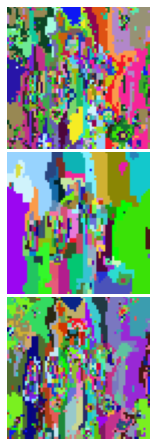

In [8]:
fig = plt.figure(constrained_layout=False,figsize=(12,12))
gs = fig.add_gridspec(nrows=3, ncols=1, left=0, right=1.5,bottom=0,top=0.5, wspace=0.002,hspace=0.02)

ax1 = fig.add_subplot(gs[0,0])

ax1.axis('off')
im=ax1.imshow(im_ap)

ax2 = fig.add_subplot(gs[1,0])

ax2.axis('off')
im=ax2.imshow(im_hac)

ax3 = fig.add_subplot(gs[2,0])

ax3.axis('off')
im=ax3.imshow(im_km)

(4096, 4)
4096
(4096, 8)
4096
(4096, 12)
4096
(4096, 16)
4096


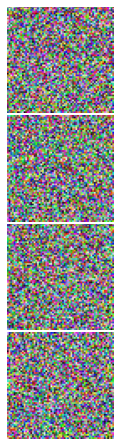

In [3]:
import sys
sys.path.append("..")
import numpy as np
import matplotlib.pyplot as plt
#import matplotlib.gridspec as gridspec

from scipy import fft


import lauetools.LaueTools.IOimagefile as IOimage

#from libtiff import TIFF

from sklearn import cluster
from sklearn.feature_extraction.image import grid_to_graph

from sklearn import metrics


nx,ny=64,64#146

#X=np.load('spatial_X.npy')#[:nx,60:60+ny,:]
#argmin=X[:,0].argmin()
FA_frequency=np.load('0-64-60-124/frequency_features.npy')
#RS_spatial = agglo.inverse_transform(FA_spatial)
#RS_spatial=RS_spatial.reshape((nx,ny,128,128))



from sklearn.decomposition import PCA

fig = plt.figure(constrained_layout=False,figsize=(12,12))
gs = fig.add_gridspec(nrows=4, ncols=1, left=0, right=1.5,bottom=0,top=0.5, wspace=0.002,hspace=0.02)

for n_pca in (4,8,12,16):
    pca = PCA(n_components=n_pca, svd_solver='randomized')
    pca_features=pca.fit_transform(FA_frequency)#components_
    print(pca_features.shape)
    af = cluster.AffinityPropagation(max_iter=5000,random_state=None,preference=-50).fit(pca_features)
    cluster_centers_indices = af.cluster_centers_indices_
    labels = af.labels_
    n_clusters_ = len(cluster_centers_indices)
    print(n_clusters_)
    colors=np.random.uniform(size=(n_clusters_,3))
    labels=labels.reshape((nx,ny))
    im=np.zeros(tuple(list(labels.shape)+[3]))
    for i in range(nx):
        for j in range(ny):
            im[i,j]=colors[labels[i,j]]
    ax = fig.add_subplot(gs[n_pca//4 - 1,0])
    ax.axis('off')
    ax.imshow(im)

#pca_features=pca.fit_transform(np.delete(FA_spatial,argmin,0))#components_

#pca_features=np.insert(pca_features,argmin,np.zeros(n_pca),0)

In [3]:
import sys
import time
sys.path.append("..")
import numpy as np
import matplotlib.pyplot as plt
#import matplotlib.gridspec as gridspec

from scipy import fft


import lauetools.LaueTools.IOimagefile as IOimage

#from libtiff import TIFF

from sklearn import cluster
from sklearn.feature_extraction.image import grid_to_graph

from sklearn import metrics


nx,ny=64,64#146

#X=np.load('spatial_X.npy')#[:nx,60:60+ny,:]
#argmin=X[:,0].argmin()
FA_spatial=np.load('0-64-60-124/spatial_features.npy')
#RS_spatial = agglo.inverse_transform(FA_spatial)
#RS_spatial=RS_spatial.reshape((nx,ny,128,128))



from sklearn.decomposition import PCA

fig = plt.figure(constrained_layout=False,figsize=(12,12))
gs = fig.add_gridspec(nrows=4, ncols=1, left=0, right=1.5,bottom=0,top=0.5, wspace=0.002,hspace=0.02)

for n_pca in (4,8,12,16):
    pca = PCA(n_components=n_pca, svd_solver='randomized')
    pca_features=pca.fit_transform(FA_spatial)#components_
    print(pca_features.shape)
    time_start=time.time()
    af = cluster.AffinityPropagation(max_iter=5000,random_state=None,preference=-50).fit(pca_features)
    time_end=time.time()
    cluster_centers_indices = af.cluster_centers_indices_
    labels = af.labels_
    n_clusters_ = len(cluster_centers_indices)
    print(n_clusters_)
    colors=np.random.uniform(size=(n_clusters_,3))
    np.save("ap_%i"%n_pca,(labels,time_end-time_start))
    #labels=labels.reshape((nx,ny))
    #im=np.zeros(tuple(list(labels.shape)+[3]))
    #for i in range(nx):
    #    for j in range(ny):
    #        im[i,j]=colors[labels[i,j]]
    #ax = fig.add_subplot(gs[n_pca//4 - 1,0])
    #ax.axis('off')
    #ax.imshow(im)

#pca_features=pca.fit_transform(np.delete(FA_spatial,argmin,0))#components_

#pca_features=np.insert(pca_features,argmin,np.zeros(n_pca),0)

Missing fabio module. Please install it if you need open some tiff images from the sCMOS camera
LaueToolsProjectFolder ..\lauetools\LaueTools
you are using python 3
(4096, 4)
78
(4096, 8)
150
(4096, 12)
210
(4096, 16)
268


<Figure size 864x864 with 0 Axes>

In [8]:
import sys
import time
sys.path.append("..")
import numpy as np
import matplotlib.pyplot as plt
#import matplotlib.gridspec as gridspec

from scipy import fft

from sklearn.cluster import KMeans

#n_clusters_=213



import lauetools.LaueTools.IOimagefile as IOimage

#from libtiff import TIFF

from sklearn import cluster
from sklearn.feature_extraction.image import grid_to_graph

from sklearn import metrics


nx,ny=64,64#146

#X=np.load('spatial_X.npy')#[:nx,60:60+ny,:]
#argmin=X[:,0].argmin()
FA_spatial=np.load('0-64-60-124/spatial_features.npy')
#RS_spatial = agglo.inverse_transform(FA_spatial)
#RS_spatial=RS_spatial.reshape((nx,ny,128,128))



from sklearn.decomposition import PCA

fig = plt.figure(constrained_layout=False,figsize=(12,12))
gs = fig.add_gridspec(nrows=4, ncols=1, left=0, right=1.5,bottom=0,top=0.5, wspace=0.002,hspace=0.02)

for n_pca in (4,8,12,16):
    pca = PCA(n_components=n_pca, svd_solver='randomized')
    pca_features=pca.fit_transform(FA_spatial)#components_
    print(pca_features.shape)
    n_clusters_=np.unique(np.load("ap_%i.npy"%n_pca,allow_pickle=True)[0]).shape[0]
    time_start=time.time()
    labels = KMeans(n_clusters=n_clusters_, init='k-means++').fit_predict(pca_features)
    time_end=time.time()
    print(time_end-time_start)
    np.save("kmean_%i"%n_pca,(labels,time_end-time_start))
    #labels=labels.reshape((nx,ny))
    #im=np.zeros(tuple(list(labels.shape)+[3]))
    #for i in range(nx):
    #    for j in range(ny):
    #        im[i,j]=colors[labels[i,j]]
    #ax = fig.add_subplot(gs[n_pca//4 - 1,0])
    #ax.axis('off')
    #ax.imshow(im)

#pca_features=pca.fit_transform(np.delete(FA_spatial,argmin,0))#components_

#pca_features=np.insert(pca_features,argmin,np.zeros(n_pca),0)

Missing fabio module. Please install it if you need open some tiff images from the sCMOS camera
LaueToolsProjectFolder ..\lauetools\LaueTools
you are using python 3
(4096, 4)
1.643378496170044
(4096, 8)
3.059873580932617
(4096, 12)
4.422407627105713
(4096, 16)
5.28234076499939


<Figure size 864x864 with 0 Axes>

In [7]:
import numpy as np
xxx=np.load("ap_12.npy",allow_pickle=True)
labels=xxx[0]
print(np.unique(labels).shape)

(210,)
